## Avacado
### Problem Statement:
#### Avocado is a fruit consumed by people heavily in the United States.
#### Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation AveragePrice - the average price of a single avocado type - conventional or organic year - the year Region - the city or region of the observation Total Volume - Total number of avocados sold 4046 - Total number of avocados with PLU 4046 sold 4225 - Total number of avocados with PLU 4225 sold 4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
Data = pd.read_csv('avocado.csv')
Data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


The dataset has been defined to the variable Data. We have 18249 rows and 14 columns.

As seen in the dataset the column Unnamed is taken on the basis of index purpose which does not play any important role in the price prediction of avocado, so I am dropping this column.

In [3]:
Data.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
Data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Explartory Data Analysis

In [5]:
Data.shape

(18249, 13)

In [6]:
Data.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

The columns in the dataset contains three different types of data namely float, integer and object data type. There are 3 columns having object data type that are categorical in nature which we need to process separately by using encoding methods.

In [7]:
Data['Date'] = pd.to_datetime(Data['Date'])

In [8]:
Data.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [9]:
Data['Month'] = Data['Date'].dt.month

In [10]:
Data['Day'] = Data['Date'].dt.day

Now we have separated Month and Day from Date column and now the column Date is of no use, so let's drop it.

In [11]:
Data.drop("Date",axis=1,inplace=True)

In [12]:
Data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [13]:
Data.shape

(18249, 14)

In [14]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


In [15]:
Data.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

In [16]:
Data.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

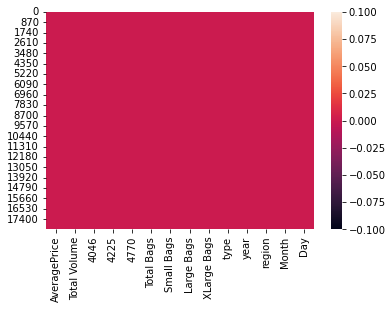

In [17]:
sns.heatmap(Data.isnull());

Now we can clearly see that there is no null values present in the dataset.

In [18]:
Data.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [19]:
Data['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [20]:
Data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [21]:
Data['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

#### Stastical Description

In [22]:
Data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

In [23]:
# checking for categorical columns
categorical_col=[]
for i in Data.dtypes.index:
    if Data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['type', 'region']


These are the categorical columns that we have, will encode these columns using either label encoder or one hot encoder.

In [24]:
# checking for categorical columns
numerical_col=[]
for i in Data.dtypes.index:
    if Data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


### Data Visualization

#### Univariate Analysis

conventional    9126
organic         9123
Name: type, dtype: int64


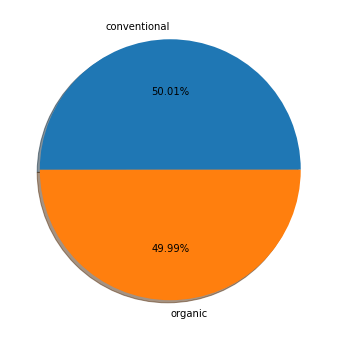

In [25]:
print(Data['type'].value_counts())
labels = 'conventional','organic'
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(Data['type'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True);

We can observe both conventional and organic types of avocado are equal in counts. Which means half of the avocado products involves chemicals. Both types have equal demand.

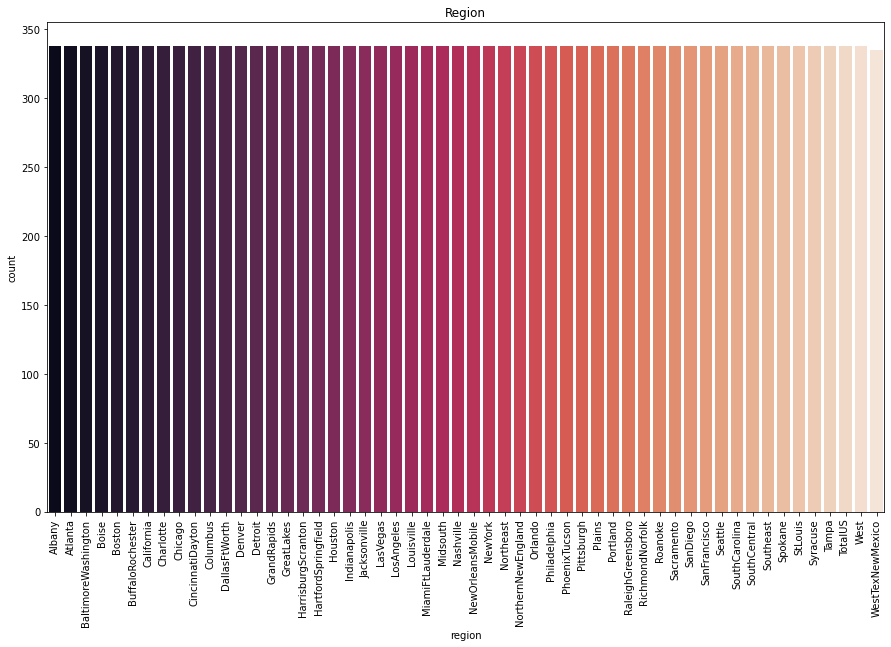

In [26]:
#Visualize the count of year
plt.figure(figsize=(15,9))
sns.countplot(Data["region"],palette="rocket")
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

We can observe the count of avocado is almost same in all the regions, all of them have the count 338 but WestTexNewMexico has count 335 which is bit less than others.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


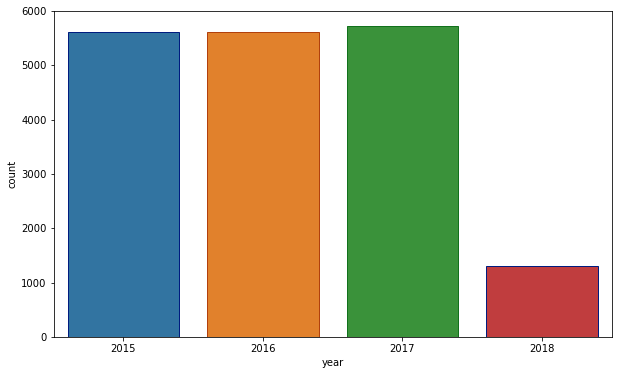

In [27]:
#Visualize the count of year
print(Data['year'].value_counts())
plt.figure(figsize=(10,6))

sns.countplot(Data["year"],edgecolor=sns.color_palette("dark", 3))
plt.show()

The count of 2017 is bit higher than 2016 and 2015, 2018 has very less count, whch means the price and the sales of avocado is less in this year

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


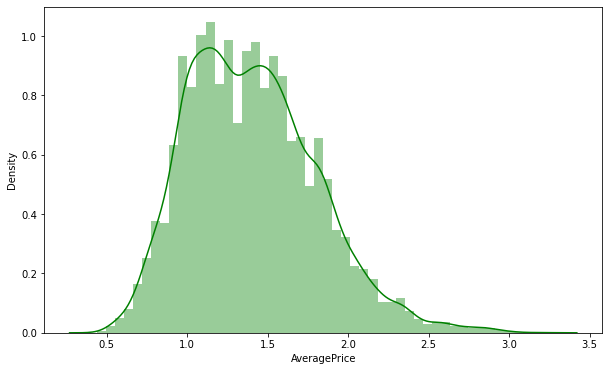

In [28]:
# Distribution plot for target variable 'AveragePrice'
print(Data['AveragePrice'].value_counts())
plt.figure(figsize=(10,6))
sns.distplot(Data['AveragePrice'],color='g');

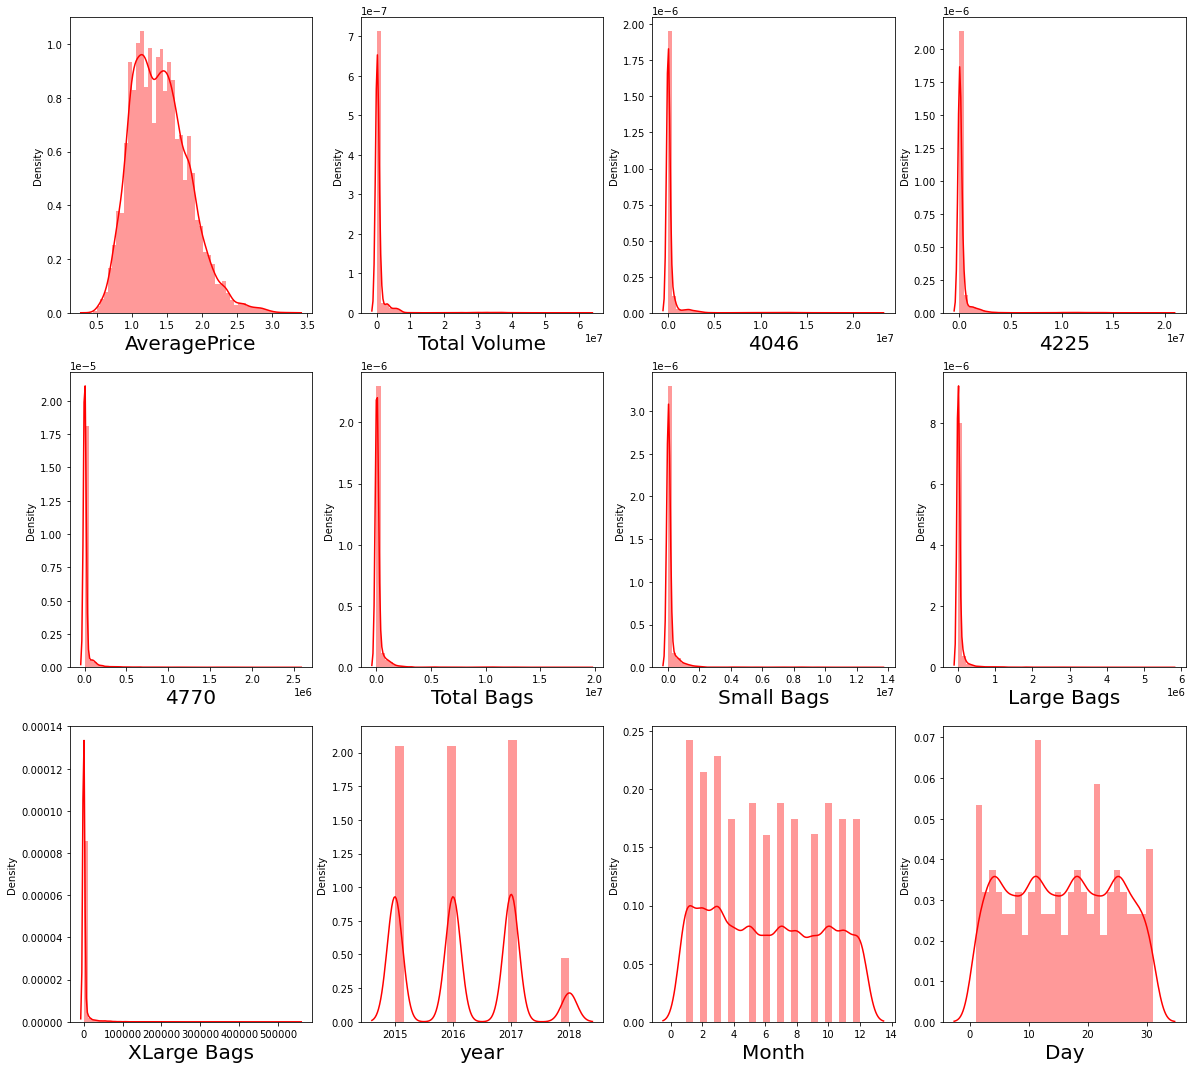

In [29]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(Data[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

From the above distplots we can observe that none of the columns are normally distributed but AveragePrice.

Also the columns contains huge skewness most of them are skewed to left, which means median is more than the mean in these columns. So will remove these skewness later

#### Bivariate Analysis

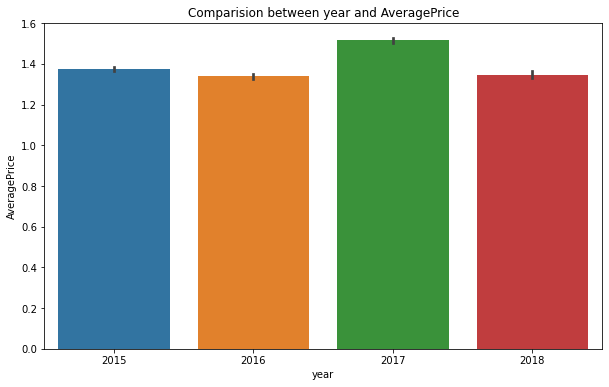

In [30]:
plt.figure(figsize=[10,6])
plt.title('Comparision between year and AveragePrice')
sns.barplot(Data['year'],Data['AveragePrice'], data=Data);
plt.xlabel("year")
plt.ylabel("AveragePrice");

The barplot shows that the AveragePrice is maximum in the year 2017 followed by 2015.

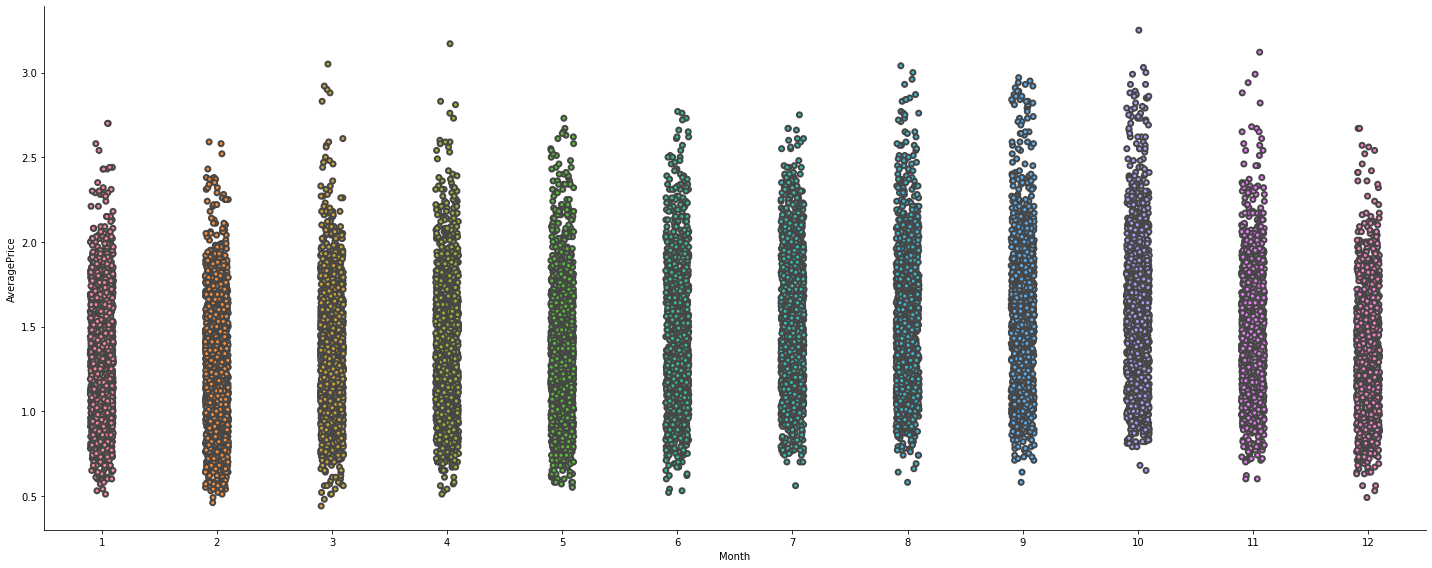

In [31]:
sns.catplot(x = "Month", y = "AveragePrice", kind="strip",data=Data,height=8, linewidth=2, aspect=2.5);

Based on plot we can observe the Average Price remains high during August(8th month), September(9th month) and October and starts to drop from November onwards. Also the price of avocado is less in the months may to july and again there is an increment of price of avocado in the month April and March.

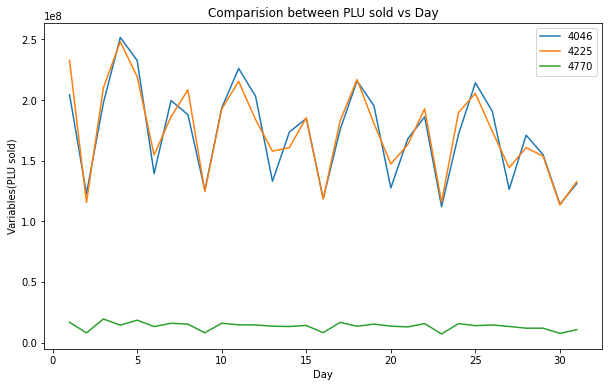

In [32]:
variables = Data[['4046', '4225', '4770']].groupby(Data.Day).sum()
variables.plot(kind='line', fontsize=10,figsize=(10,6))
plt.title("Comparision between PLU sold vs Day")
plt.xlabel("Day")
plt.ylabel("Variables(PLU sold)")
plt.show()

From the line plot we can observe how the total number of avocados with PLU 4046, PLU 4225 and PLU 4770 are sold in each day starting from day 1 to day 31. We can notice very few avocados with 4046 was sold in all the day and the avocados with PLU 4225 and PLU 4770 was sold all time high.

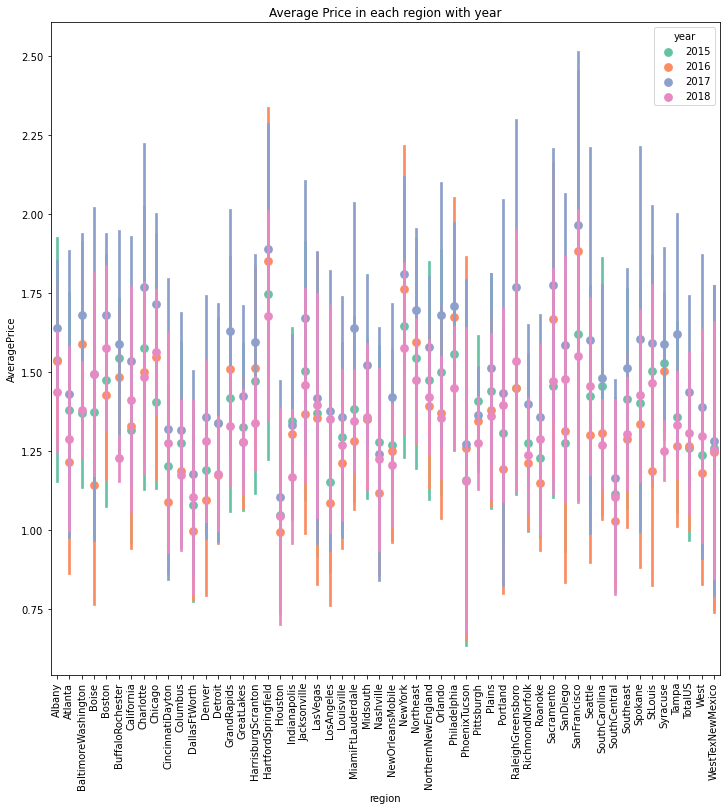

In [33]:
plt.figure(figsize=(12,12))
plt.title("Average Price in each region with year")
sns.pointplot(x='region',y='AveragePrice',data=Data, hue='year',join=False,palette="Set2",ci="sd")
plt.xticks(rotation=90)
plt.show()

The average price of the avocado is high in the region SanFrancisco followed by RaleighGreensboro in the year 2017. The demand of the fruit is high in the year 2017 and less in the year 2018.

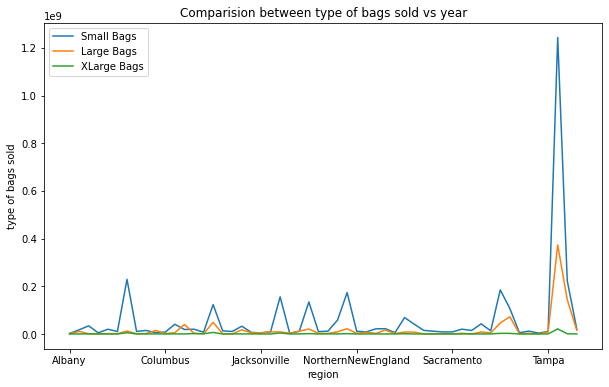

In [34]:
feature = Data[["Small Bags","Large Bags","XLarge Bags"]].groupby(Data.region).sum()
feature.plot(kind='line', fontsize=10,figsize=(10,6))
plt.title("Comparision between type of bags sold vs year")
plt.xlabel("region")
plt.ylabel("type of bags sold")
plt.show()

Small bags size sold high in the region Tampa. The price of Small bag size is also high in this region followed by Large Bags Size and Xlarge Bags size was sold least.

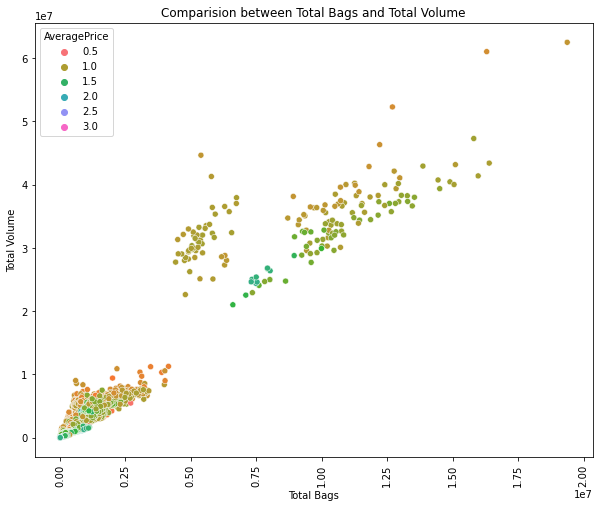

In [35]:
plt.figure(figsize=(10,8))
plt.title("Comparision between Total Bags and Total Volume")
sns.scatterplot(x='Total Bags',y='Total Volume',hue="AveragePrice",data=Data,palette="husl")
plt.xticks(rotation=90)
plt.show()

There is a linear relationship between the features. As the total bags sales increases with total volume, the average price of the avocado also increases.

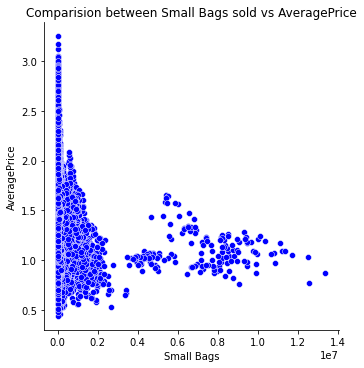

In [36]:
sns.relplot(Data['Small Bags'],Data['AveragePrice'],color="b");
plt.title("Comparision between Small Bags sold vs AveragePrice")
plt.xlabel("Small Bags")
plt.ylabel("AveragePrice")
plt.show()

The Small Bags size has high average price at first and also from the range 0-0.6, the price of small bag type is almost 1.6.

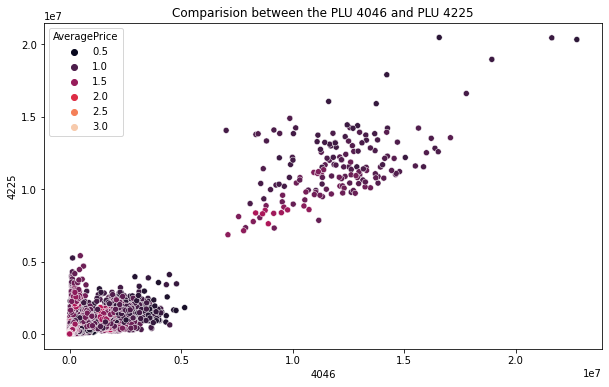

In [37]:
plt.figure(figsize=(10,6))
plt.title("Comparision between the PLU 4046 and PLU 4225")
sns.scatterplot(Data["4046"],Data["4225"],hue=Data["AveragePrice"],palette="rocket")
plt.show()

### Multivariate Analysis

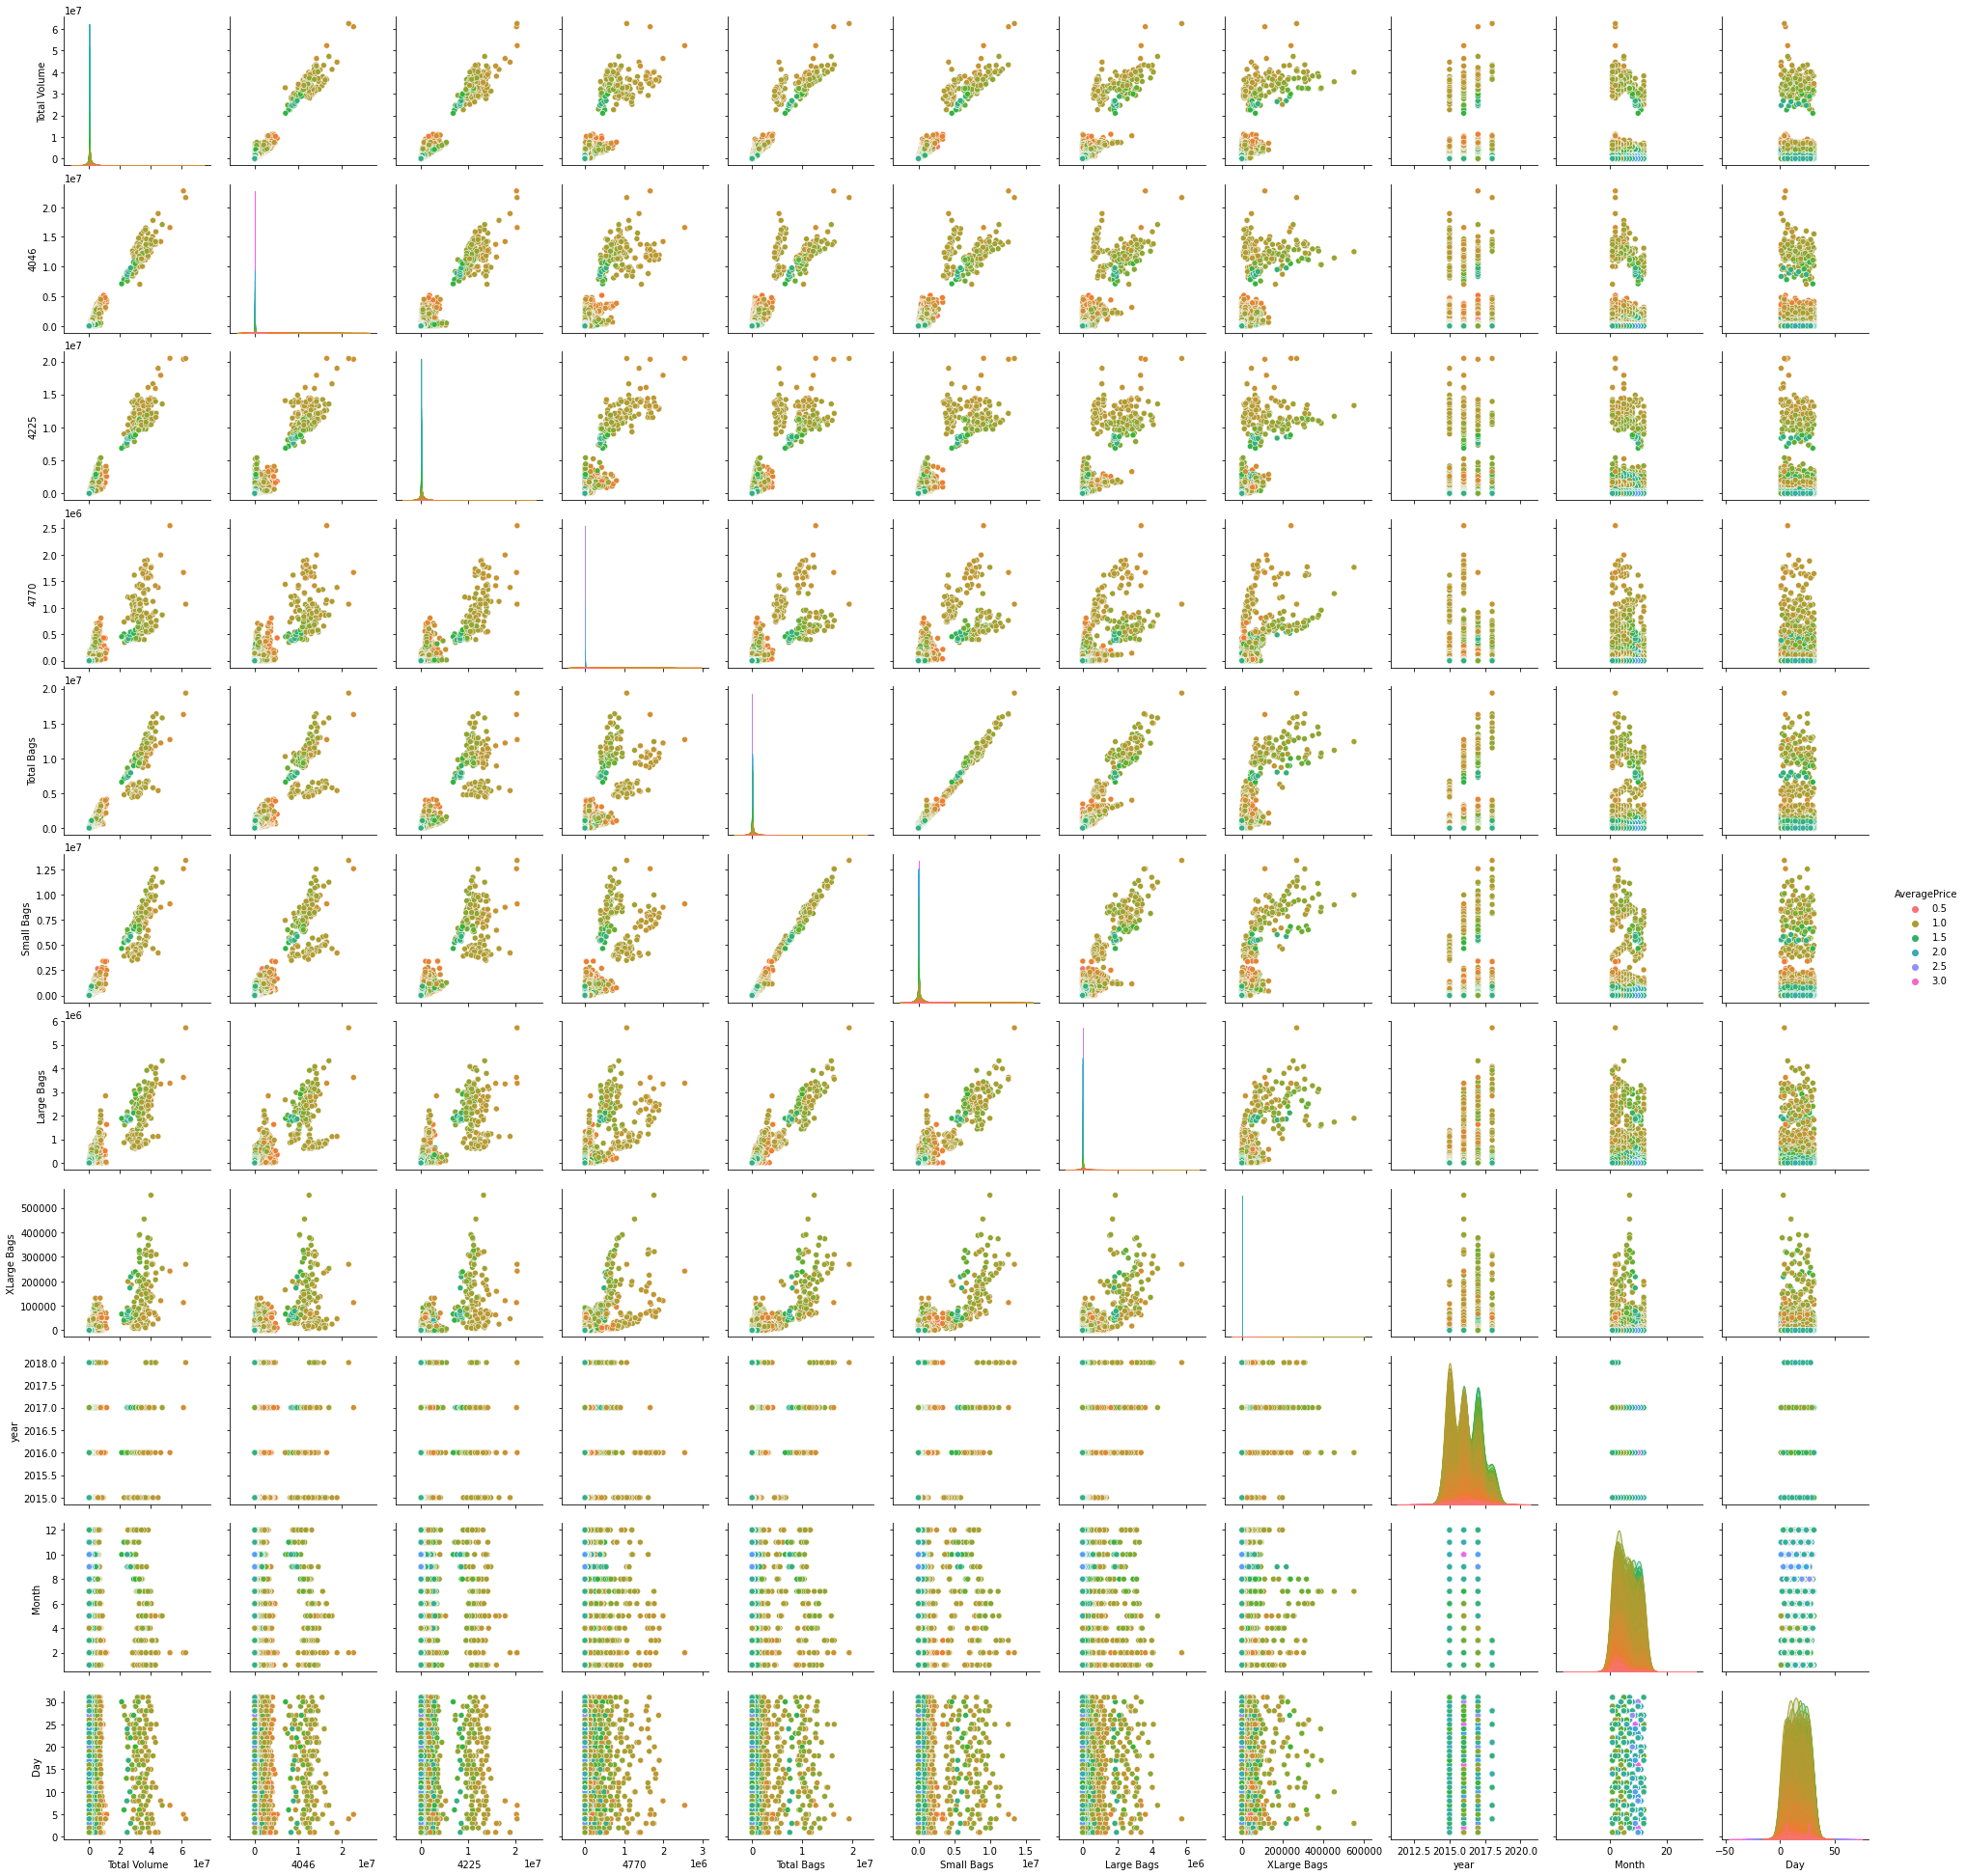

In [38]:
sns.pairplot(Data,hue="AveragePrice",palette="husl");

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "AveragePrice". Here we can observe the relation between the features and label.

### Identifying the outliers

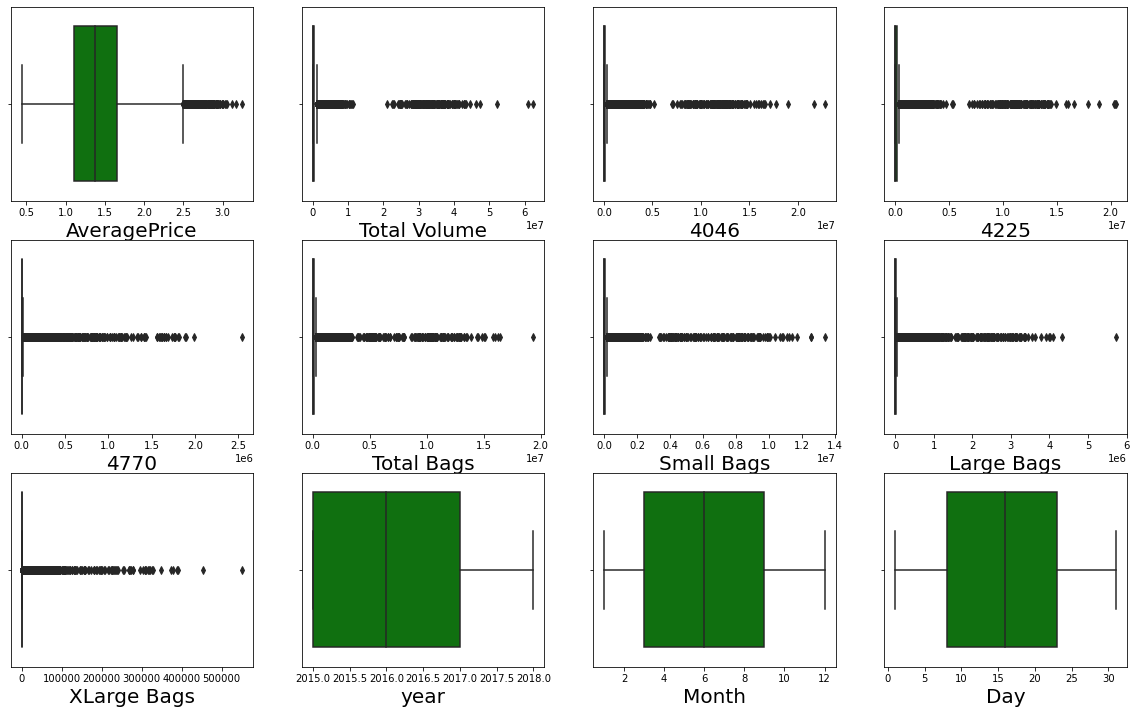

In [39]:
numerical_col=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month', 'Day']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(Data[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The outliers present in all the columns except year, Month and Day. Let's remove the outliers using Zscore method. Even AveragePrice has outliers, since it is our target variable I will keep it untouched.

### Removing Outliers

#### Zscore Method

In [40]:
Data.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [41]:
features = Data[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

In [42]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...
18244,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [43]:
# Creating new dataframe
New_Data = Data[(z<3).all(axis=1)] 
New_Data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [44]:
Data.shape

(18249, 14)

In [45]:
New_Data.shape

(17782, 14)

New Dataset has 17782 rows and 14 columns

### Checking For skewness

In [46]:
New_Data.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

### Removing skewness using yeo-johnson method

In [47]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

scaler = PowerTransformer(method='yeo-johnson')

In [49]:
New_Data[features] = scaler.fit_transform(New_Data[features].values)
New_Data[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702


In [50]:
New_Data.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [51]:
# Removing skewness using log transformation
New_Data["XLarge Bags"] = np.log1p(New_Data["XLarge Bags"])

In [52]:
New_Data.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

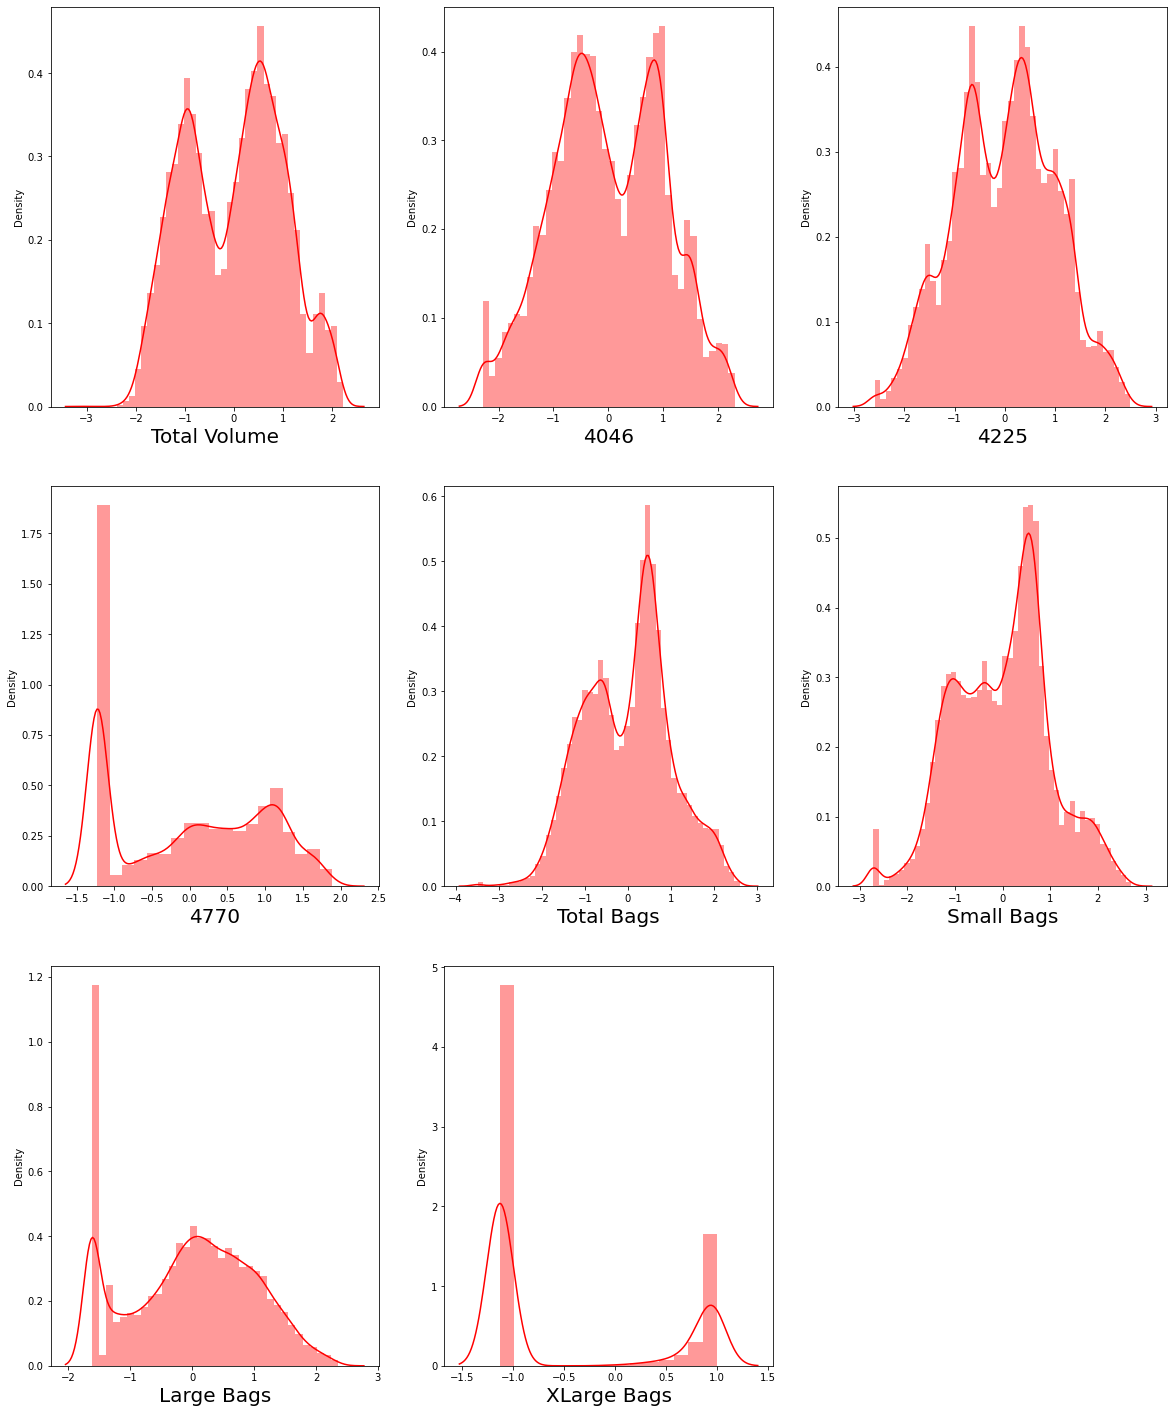

In [53]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in New_Data[features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(New_Data[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


### Encoding for the categorical data using Label Encoder

In [54]:
categorical_col = ['type','region']

In [55]:
from sklearn.preprocessing import LabelEncoder
LE =LabelEncoder()
New_Data[categorical_col]=New_Data[categorical_col].apply(LE.fit_transform)
New_Data[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


I have encoded the data using label encoding.

### Correlation between the target variable and independent variables using HEAT map

In [56]:
cor = New_Data.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.392262,0.608447,0.099910,0.010428,0.157900,0.024742
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.629752,-0.800828,0.076584,0.065709,-0.026332,-0.006248
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.575152,-0.725826,-0.002396,0.159390,-0.025919,-0.004558
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.583293,-0.747722,-0.004533,0.032273,-0.024708,-0.005919
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.617192,-0.780988,-0.051657,0.037805,-0.017377,0.001383
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.612530,-0.725686,0.210924,0.065996,-0.014571,-0.003703
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.601404,-0.720466,0.185955,0.051985,-0.010260,-0.000535
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.451796,-0.500026,0.190295,0.086573,-0.016942,-0.000876
XLarge Bags,-0.392262,0.629752,0.575152,0.583293,0.617192,0.612530,0.601404,0.451796,1.000000,-0.672461,0.156202,-0.017598,0.020885,0.010991
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.672461,1.000000,0.007399,0.021970,-0.005044,-0.002469


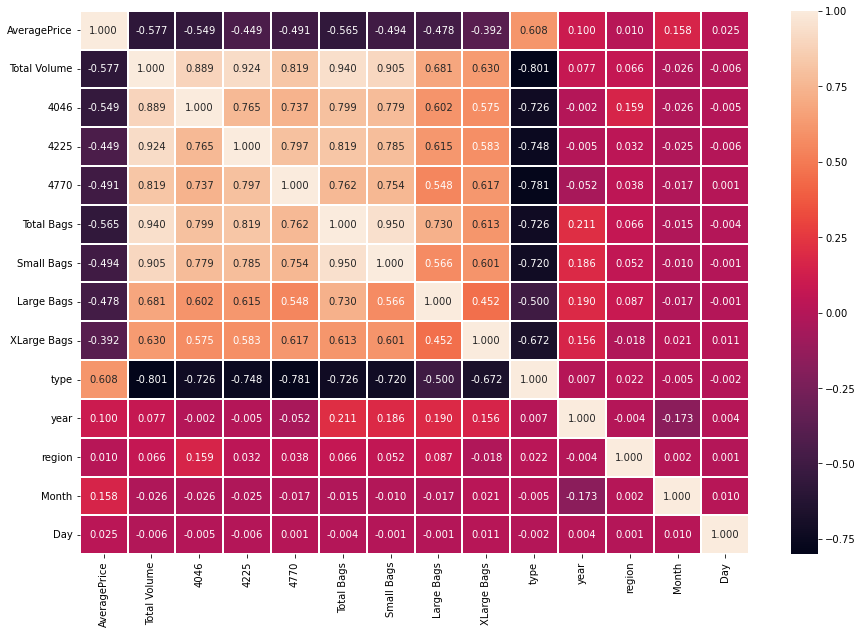

In [57]:
# Visualizing the statistics of the columns using Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(New_Data.corr(),linewidths=.1,fmt='0.3f', annot = True);

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

This heat map contains both positive and negative correlation.

Almost all the features are highly negatively correlated with the target variable and few columns year, Month and type have positive correlation with the target. The features Day and region have no relation with the target so we can drop these columns. Almost all the features are correlated with each other which leads to multicollinearity problem. We will solve this problem by VIF value. Also most of the columns have no relation with each other and have zero correlation.

In [58]:
cor['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
type            0.608447
Month           0.157900
year            0.099910
Day             0.024742
region          0.010428
XLarge Bags    -0.392262
4225           -0.448579
Large Bags     -0.477879
4770           -0.491320
Small Bags     -0.493621
4046           -0.548618
Total Bags     -0.564616
Total Volume   -0.576829
Name: AveragePrice, dtype: float64

### Visualizing the correlation

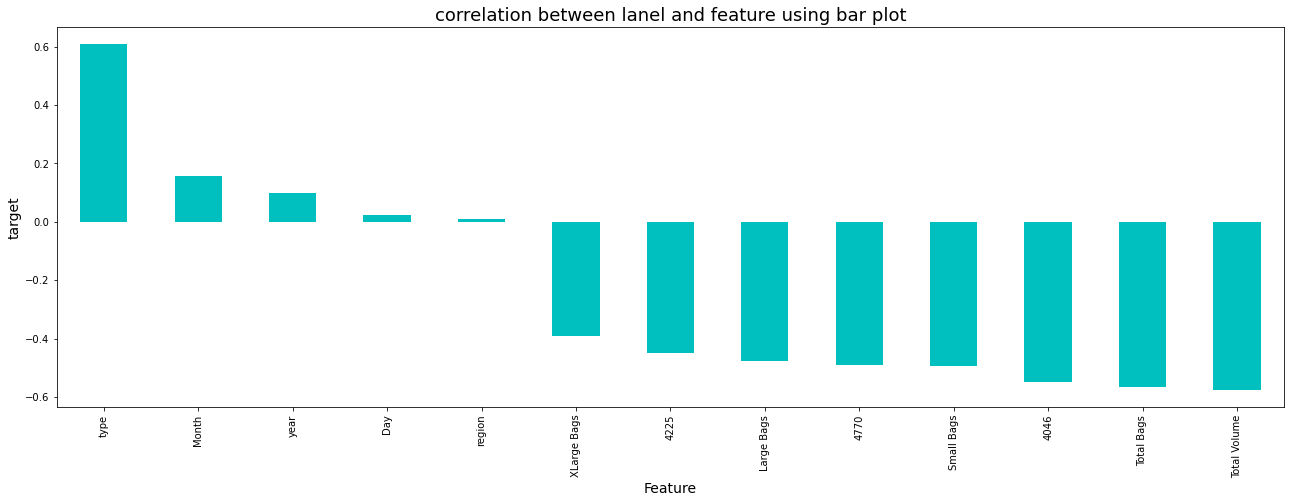

In [59]:
plt.figure(figsize=(22,7))
New_Data.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

In [60]:
New_Data.drop("Day",axis=1, inplace=True)

### Regression Model Prediction by Average Sales

In [61]:
X = New_Data.drop('AveragePrice',axis=1)
Y = New_Data['AveragePrice']

In [62]:
X.shape

(17782, 12)

In [63]:
Y.shape

(17782,)

In [64]:
X.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0,2015,0,12
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0,2015,0,12
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0,2015,0,12
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0,2015,0,12
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0,2015,0,11


### Standard Scalarization

In [65]:
Scaler = StandardScaler()
X = pd.DataFrame(Scaler.fit_transform(X),columns = X.columns)
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.685946,-1.026443,-1.214908,-1.698613,1.641434
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.685946,-1.026443,-1.214908,-1.698613,1.641434
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.685946,-1.026443,-1.214908,-1.698613,1.641434
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.685946,-1.026443,-1.214908,-1.698613,1.641434
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.685946,-1.026443,-1.214908,-1.698613,1.358706
...,...,...,...,...,...,...,...,...,...,...,...,...
17777,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-0.685946,0.974238,1.979143,1.742552,-1.185845
17778,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-0.685946,0.974238,1.979143,1.742552,-1.468572
17779,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-0.685946,0.974238,1.979143,1.742552,-1.468572
17780,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-0.685946,0.974238,1.979143,1.742552,-1.468572


In [66]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

,VIF values,Features
0,52.131276,Total Volume
1,7.153485,4046
2,11.169168,4225
3,3.952857,4770
4,34.509723,Total Bags
5,16.635346,Small Bags
6,3.462946,Large Bags
7,2.071298,XLarge Bags
8,3.757728,type
9,1.386245,year


The VIF value is more than 10 in the features Total Volume, 4225, Total Bags, Small Bags and Large Bags. First I will remove the column having high VIF value and will check the VIF again, if the value retains more than 10 then I will drop the specific column again.

In [67]:
# Dropping the feature Total Volume
X.drop("Total Volume",axis=1, inplace=True)

In [68]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

,VIF values,Features
0,3.742061,4046
1,4.283636,4225
2,3.938377,4770
3,24.480097,Total Bags
4,16.635006,Small Bags
5,3.420844,Large Bags
6,2.058386,XLarge Bags
7,3.540936,type
8,1.383804,year
9,1.078624,region


In [69]:
# Dropping the column Total Bags
X.drop("Total Bags",axis=1, inplace=True)

In [70]:
# Checking VIF again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

,VIF values,Features
0,3.723365,4046
1,4.138882,4225
2,3.938119,4770
3,4.101853,Small Bags
4,1.866013,Large Bags
5,2.058144,XLarge Bags
6,3.537713,type
7,1.359335,year
8,1.078618,region
9,1.051469,Month


In [71]:
X.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,-0.649918,0.358278,-0.212550,-0.337064,-0.775214,-0.685946,-1.026443,-1.214908,-1.698613,1.641434
1,-0.770067,0.276355,-0.165117,-0.301038,-0.765237,-0.685946,-1.026443,-1.214908,-1.698613,1.641434
2,-0.724508,0.656010,0.034215,-0.364044,-0.752534,-0.685946,-1.026443,-1.214908,-1.698613,1.641434
3,-0.625017,0.475615,-0.110976,-0.500341,-0.693012,-0.685946,-1.026443,-1.214908,-1.698613,1.641434
4,-0.677083,0.268966,-0.100289,-0.479918,-0.600755,-0.685946,-1.026443,-1.214908,-1.698613,1.358706


### Modeling

#### Finding best random state

In [72]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.30, random_state=i)
    KNN = KNeighborsRegressor()
    KNN.fit(X_train, Y_train)
    pred = KNN.predict(X_test)
    acc=r2_score(Y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8740110605968504  on Random_state  49


Getting an r2 score of 76% at a random state of 144

In [73]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.30,random_state=maxRS)

### Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [75]:
LR = LinearRegression()
LR.fit(X_train,Y_train)

# [Prediction]
predLR = LR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predLR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predLR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predLR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predLR)))

R2 Score: 0.5147008353742311
Mean Absolute Error 0.2181614991496366
Mean Squared Error 0.08004250882857523
Root Mean Squared Error 0.28291784819727306


### Linear Regression with Ridge

In [76]:
from sklearn.model_selection import GridSearchCV
paramsRidge ={'alpha':[0.01,0.1,1.0,10.26],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge = Ridge()
clf = GridSearchCV(ridge,paramsRidge)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 10.26, 'solver': 'sag'}


In [77]:
ridge = Ridge(alpha = 10.26,solver = 'sag')
ridge.fit(X_train,Y_train)
ridge.score(X_train,Y_train)
pred_ridge = ridge.predict(X_test)
print('R2 Score:',r2_score(Y_test,pred_ridge))
print('Mean Absolute Error',mean_absolute_error(Y_test,pred_ridge))
print('Mean Squared Error',mean_squared_error(Y_test,pred_ridge))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,pred_ridge)))

R2 Score: 0.514678031590237
Mean Absolute Error 0.21815472322327592
Mean Squared Error 0.08004626995617388
Root Mean Squared Error 0.28292449515051515


Ridge gave a R2 score of 51%

### Linear Regression With Lasso

In [78]:
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
lasso = Lasso()
clf=GridSearchCV(lasso,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [79]:
lasso = Lasso(alpha=1,random_state=0)
lasso.fit(X_train,Y_train)
lasso.score(X_train,Y_train)
pred_lasso = lasso.predict(X_test)
print('R2 Score:',r2_score(Y_test,pred_lasso))
print('Mean Absolute Error',mean_absolute_error(Y_test,pred_lasso))
print('Mean Squared Error',mean_squared_error(Y_test,pred_lasso))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,pred_lasso)))

R2 Score: -1.5724364710312244e-06
Mean Absolute Error 0.3247917404095144
Mean Squared Error 0.164934622856932
Root Mean Squared Error 0.40612143855863114


Got an R2 Score of -1.57%

### Random Forest Regressor

In [80]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import cross_val_score

In [81]:
RFR = RandomForestRegressor()
RFR.fit(X_train,Y_train)

# Prediction
pred_RFR = RFR.predict(X_test)
print('R2 Score:',r2_score(Y_test,pred_RFR))

# Mean Absolute Error (MAE)
print('Mean Absolute Error (MAE)',mean_absolute_error(Y_test,pred_RFR))

# Mean Squared Error (MSE)
print('Mean Squared Error (MSE)',mean_squared_error(Y_test,pred_RFR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error (RMSE)',np.sqrt(mean_squared_error(Y_test,pred_RFR)))

# Checking CV score for Random Forest Regresion
print('Cross Validation Score',cross_val_score(RFR,X,Y,cv=5).mean())

R2 Score: 0.8871913360972218
Mean Absolute Error (MAE) 0.09573208997188376
Mean Squared Error (MSE) 0.018606025179006558
Root Mean Squared Error (RMSE) 0.13640390455924112
Cross Validation Score 0.21339061358975883


### GradientBoosting Regressor

In [82]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(X_train,Y_train)

# Prediction
pred_GB = GB.predict(X_test)
print('R2 Score:',r2_score(Y_test,pred_GB))

# Mean Absolute Error (MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,pred_GB))

# Mean Squared Error (MSE)
print('Mean Squared Error (MSE)',mean_squared_error(Y_test,pred_GB))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error (RMSE)',np.sqrt(mean_squared_error(Y_test,pred_GB)))

# Checking CV Score for GradientBoosting Regressor
print('Cross Validation Score',cross_val_score(GB,X,Y,cv=5).mean())

R2 Score: 0.7398410741912826
Mean Absolute Error 0.1560348189094327
Mean Squared Error (MSE) 0.042909146839217926
Root Mean Squared Error (RMSE) 0.20714523127317686
Cross Validation Score 0.38724125990080666


### Stochastic Gradient Descent Regressor

In [83]:
from sklearn.linear_model import SGDRegressor
SGDR = SGDRegressor()
SGDR.fit(X_train,Y_train)

# Prediction 
pred_SGDR = SGDR.predict(X_test)
print('R2 Score:',r2_score(Y_test,pred_SGDR))

# Mean Absolute Error (MAE)
print('Mean Absolute Error (MAE)',mean_absolute_error(Y_test,pred_SGDR))

# Mean Squared Error (MSE)
print('Mean Squared Error (MSE)',mean_squared_error(Y_test,pred_SGDR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error (RMSE)',np.sqrt(mean_squared_error(Y_test,pred_SGDR)))

print("Cross_Validation_Score",cross_val_score(SGDR,X,Y,cv=5).mean())

R2 Score: 0.5134821614840022
Mean Absolute Error (MAE) 0.21845577566706514
Mean Squared Error (MSE) 0.08024351003098411
Root Mean Squared Error (RMSE) 0.28327285438422106
Cross_Validation_Score 0.1022724924176061


### KNeighbors Regressor

In [84]:
KNN = KNeighborsRegressor()
KNN.fit(X_train,Y_train)

# Prediction
pred_KNN = KNN.predict(X_test)
print('R2 Score:',r2_score(Y_test,pred_KNN))

# Mean Absolute Error (MAE)
print('Mean Absolute Error (MAE)',mean_absolute_error(Y_test,pred_KNN))

# Mean Squared Error (MSE)
print('Mean Squared Error (MSE)',mean_squared_error(Y_test,pred_KNN))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error (RMSE)',np.sqrt(mean_squared_error(Y_test,pred_KNN)))

print("Cross_Validation_Score",cross_val_score(KNN,X,Y,cv=5).mean())

R2 Score: 0.8740110605968504
Mean Absolute Error (MAE) 0.10129147141518277
Mean Squared Error (MSE) 0.020779905529522025
Root Mean Squared Error (RMSE) 0.14415236914293855
Cross_Validation_Score -0.01811860375811707


### Support Vector Machine Regressor

In [85]:
from sklearn.svm import SVR

In [86]:
svr = SVR()
svr.fit(X_train,Y_train)

# Prediction
pred_svr = svr.predict(X_test)
print('R2 Score:',r2_score(Y_test,pred_svr))

# Mean Absolute Error (MAE)
print('Mean Absolute Error (MAE)',mean_absolute_error(Y_test,pred_svr))

# Mean Squared Error (MSE)
print('Mean Squared Error (MSE)',mean_squared_error(Y_test,pred_svr))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error (RMSE)',np.sqrt(mean_squared_error(Y_test,pred_svr)))

print("Cross_Validation_Score",cross_val_score(svr,X,Y,cv=5).mean())

R2 Score: 0.7960770496780597
Mean Absolute Error (MAE) 0.13423720339992698
Mean Squared Error (MSE) 0.033633902016047906
Root Mean Squared Error (RMSE) 0.1833954798135655
Cross_Validation_Score 0.007958673353282753


### Checking the cross validation score

In [87]:
# Linear Regression
print('checking CV Score For Linear Regression',cross_val_score(LR,X,Y,cv=5).mean())

# Ridge Regression
print('checking CV Score For Ridge Regression',cross_val_score(ridge,X,Y,cv=5).mean())

# Lasso Regression
print('checking CV Score For Lasso Regression',cross_val_score(lasso,X,Y,cv=5).mean())

# Random Forest Regressor
print('checking CV Score For Random Forest Regression',cross_val_score(RFR,X,Y,cv=5).mean())

# Gradient Boosting Regressor
print('checking CV Score For Gradient Boosting Regression',cross_val_score(GB,X,Y,cv=5).mean())

# Gradient Descent Regressor
print('checking CV Score For Gradient Descent Regression',cross_val_score(SGDR,X,Y,cv=5).mean())

# KNeighbors Regressor
print('checking CV Score For KNeighbors Regressor',cross_val_score(KNN,X,Y,cv=5).mean())

# Support Vector Machine Regressor
print('checking CV Score For Support Vector Machine Regressor',cross_val_score(svr,X,Y,cv=5).mean())

checking CV Score For Linear Regression 0.08855676789690055
checking CV Score For Ridge Regression 0.08908535399675754
checking CV Score For Lasso Regression -1.2004309324076277
checking CV Score For Random Forest Regression 0.23333994865687896
checking CV Score For Gradient Boosting Regression 0.3872431565062886
checking CV Score For Gradient Descent Regression 0.08161167790021329
checking CV Score For KNeighbors Regressor -0.01811860375811707
checking CV Score For Support Vector Machine Regressor 0.007958673353282753


### Hyperparameter Tuning

In [88]:
parameter = {'n_neighbors':[1,2,3,4],
            'weights':['uniform','distance'],
            'algorithm':['auto','ball_tree','kd_tree','brute'],
            'n_jobs':[10,20,30,40]}

In [89]:
GCV=GridSearchCV(KNN,parameter,cv=5)

In [90]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_jobs': [10, 20, 30, 40],
                         'n_neighbors': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']})

In [91]:
GCV.best_params_

{'algorithm': 'brute', 'n_jobs': 10, 'n_neighbors': 3, 'weights': 'distance'}

In [92]:
Final_mod=KNeighborsRegressor(algorithm='brute',n_jobs=10,n_neighbors=3,weights='distance')
Final_mod.fit(X_train,Y_train)
pred=Final_mod.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(Y_test, pred)))

R2_Score: 89.24691864567531
mean_squared_error: 0.017735526289266137
mean_absolute_error: 0.08947110954068636
RMSE value: 0.13317479599859028


###  Plotting ROC and compare AUC for all the models used

### Classification Model Prediction by Region

In [102]:
x = New_Data.drop('region',axis=1)
y = New_Data['region']

In [103]:
scaler = StandardScaler()
scaler.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

### Creating Train Test Split

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=49)

### Logistic Regression

In [108]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
LOR = LogisticRegression()
LOR.fit(x_train,y_train)
pred_LOR = LOR.predict(x_test)

print(accuracy_score(y_test,pred_LOR))
print(confusion_matrix(y_test,pred_LOR))
print(classification_report(y_test,pred_LOR))

0.20712277413308341
[[31  0  0 ...  0  0  0]
 [ 1 17  0 ...  0  0  2]
 [ 0  0 17 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ... 18  8  1]
 [ 0  4  6 ...  0  3  6]]
              precision    recall  f1-score   support

           0       0.21      0.27      0.23       114
           1       0.08      0.19      0.11        88
           2       0.17      0.19      0.18        90
           3       0.20      0.14      0.16       102
           4       0.12      0.12      0.12       102
           5       0.05      0.08      0.06       101
           6       0.26      0.28      0.27        85
           7       0.37      0.63      0.47        93
           8       0.55      0.45      0.49       112
           9       0.27      0.32      0.29        98
          10       0.11      0.13      0.12        99
          11       0.20      0.18      0.19       107
          12       0.13      0.24      0.17       107
          13       0.00      0.00      0.00        88
          14 

### Decision Tree Classifier

In [110]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred_DTC = DTC.predict(x_test)

print(accuracy_score(y_test, pred_DTC))
print(confusion_matrix(y_test, pred_DTC))
print(classification_report(y_test,pred_DTC))

0.785941893158388
[[88  0  0 ...  0  0  0]
 [ 0 58  0 ...  0  0  2]
 [ 0  0 83 ...  0  0  1]
 ...
 [ 0  0  0 ... 59  0  0]
 [ 0  0  0 ...  1 69  0]
 [ 0  2  1 ...  0  0 62]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       114
           1       0.62      0.66      0.64        88
           2       0.85      0.92      0.88        90
           3       0.79      0.77      0.78       102
           4       0.85      0.86      0.86       102
           5       0.71      0.72      0.72       101
           6       0.96      0.89      0.93        85
           7       0.81      0.83      0.82        93
           8       0.94      0.90      0.92       112
           9       0.75      0.78      0.76        98
          10       0.64      0.66      0.65        99
          11       0.79      0.88      0.83       107
          12       0.93      0.85      0.89       107
          13       0.67      0.67      0.67        88
          14   

### Support Vector Machine Classifier

In [113]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.015745079662605434
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       114
           1       0.00      0.00      0.00        88
           2       0.00      0.00      0.00        90
           3       0.00      0.00      0.00       102
           4       0.00      0.00      0.00       102
           5       0.00      0.00      0.00       101
           6       0.00      0.00      0.00        85
           7       0.00      0.00      0.00        93
           8       0.00      0.00      0.00       112
           9       0.00      0.00      0.00        98
          10       0.00      0.00      0.00        99
          11       0.00      0.00      0.00       107
          12       0.00      0.00      0.00       107
          13       0.00      0.00      0.00        88
          14       0.00      0.00      0.00     

### Gradient Boosting Classifier

In [114]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
pred_GBC = GBC.predict(x_test)

print(accuracy_score(y_test,pred_GBC))
print(confusion_matrix(y_test,pred_GBC))
print(classification_report(y_test,pred_GBC))

0.8277413308341144
[[95  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  2]
 [ 0  0 84 ...  0  0  1]
 ...
 [ 0  0  0 ... 58  1  0]
 [ 0  0  0 ...  0 71  0]
 [ 0  1  2 ...  0  0 68]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       114
           1       0.63      0.57      0.60        88
           2       0.92      0.93      0.93        90
           3       0.83      0.75      0.78       102
           4       0.89      0.86      0.88       102
           5       0.74      0.74      0.74       101
           6       0.99      0.94      0.96        85
           7       0.86      0.89      0.87        93
           8       0.99      0.94      0.96       112
           9       0.85      0.86      0.85        98
          10       0.70      0.70      0.70        99
          11       0.88      0.85      0.87       107
          12       0.91      0.91      0.91       107
          13       0.70      0.78      0.74        88
          14  

### Checking the Cross Validation Score

In [115]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

# cv score for Logistic Regression 
print(cross_val_score(LOR,x,y,cv=5).mean())

# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

# cv score for Gradient Boosting Classifier
print(cross_val_score(GBC,x,y,cv=5).mean())

0.533624962960597
0.12698120880799374
0.02277560399130598
0.5963301818085223


### Hyper parameter tuning for best model

In [116]:
# Gradient Boosting Classifier
parameters = {'n_estimators':[100],
             'max_features':["auto"],
             'max_leaf_nodes':[10,20]}

In [117]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [118]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_features': ['auto'], 'max_leaf_nodes': [10, 20],
                         'n_estimators': [100]})

In [119]:
GCV.best_params_

{'max_features': 'auto', 'max_leaf_nodes': 10, 'n_estimators': 100}

In [120]:
Region = GradientBoostingClassifier(max_features='auto', max_leaf_nodes=20, n_estimators=100)
Region.fit(x_train, y_train)
pred = Region.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

82.83036551077788


After Hyperparameter Tuning, we get an accuracy score of 76%

### Plotting ROC-AUC curve for best model

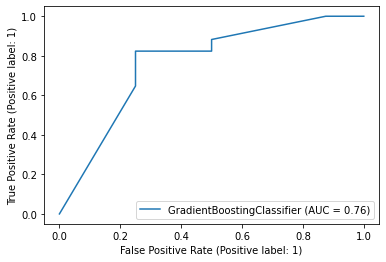

In [121]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
x,y = datasets.make_classification (random_state=49)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,random_state=49)
df = GradientBoostingClassifier(random_state=49)
df.fit(x_train, y_train)
metrics.plot_roc_curve(df, x_test, y_test)
plt.show()

### Saving the model

In [122]:
# Saving the model using .pkl
import joblib
joblib.dump(Region,"Region.pkl")

['Region.pkl']